<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Loading The Data***

In [ ]:
import pandas as pd
import numpy as np
from my_custom_utils import data_preparation,important_features_visualization_classifier,feature_selection_classifier

In [ ]:
df=pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')

In [ ]:
#df.head()

In [ ]:
df.shape

(920, 21)

### ***Data Preparation***

In [ ]:
data_final=data_preparation(df)

In [ ]:
data_final.shape

(920, 18)

### ***Feature Selection***

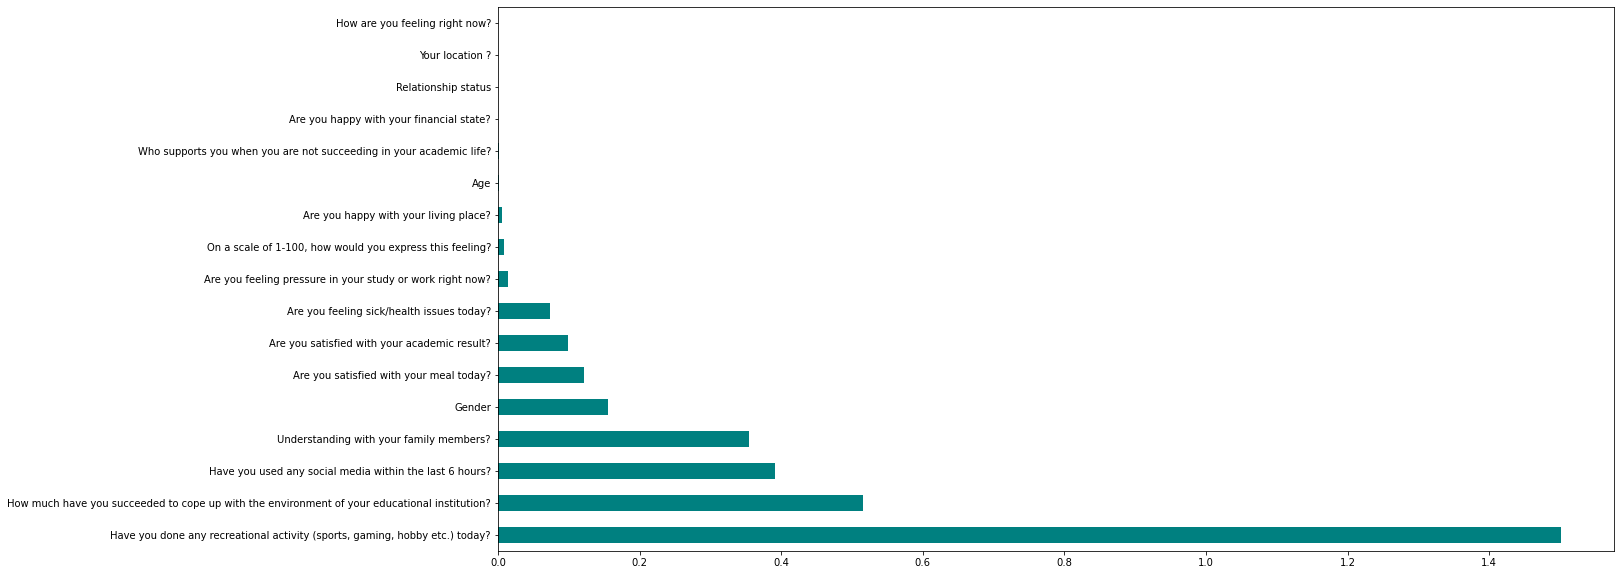

In [ ]:
imp_feat_vis=important_features_visualization_classifier(data_final)
imp_feat_vis

In [ ]:
important_features=feature_selection_classifier(data_final)
important_features

Index(['Your location ?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your meal today?',
       'On a scale of 1-100, how would you express this feeling?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

### ***Models***

Here I have used:
*   Decision Tree Classifier with both 'Gini' (Default) and 'Entropy', respectively.
*   Tuning The Best Parameter with both Grid Search CV and Randomized Search CV, respectively.



In [ ]:
#data_final.head()

In [ ]:
X_new=data_final[['Your location ?','Are you feeling pressure in your study or work right now?','Are you satisfied with your meal today?','On a scale of 1-100, how would you express this feeling?','How long did you sleep last night?(in hours)']]
y_new=data_final[['How are you feeling right now?']]

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold

***Decision Tree Classifier with Gini***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.20,stratify=y_new,random_state=21)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_train=dt.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_train,y_pred_dt_train)

0.9836956521739131

In [ ]:
y_pred_dt_test=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_dt_test)

0.9728260869565217

In [ ]:
print(confusion_matrix(y_test,y_pred_dt_test))

[[33  0  0  0  0]
 [ 0 38  1  0  0]
 [ 0  3 33  0  0]
 [ 0  0  0 33  0]
 [ 0  1  0  0 42]]


In [ ]:
print(classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      0.97      0.94        39
           2       0.97      0.92      0.94        36
           3       1.00      1.00      1.00        33
           4       1.00      0.98      0.99        43

    accuracy                           0.97       184
   macro avg       0.98      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



In [ ]:
from sklearn import tree

In [ ]:
print(tree.export_text(dt))

|--- feature_3 <= 85.00
|   |--- feature_3 <= 45.00
|   |   |--- feature_3 <= 5.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: 3
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- feature_4 <= 6.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  6.50
|   |   |   |   |   |   |--- class: 3
|   |   |--- feature_3 >  5.50
|   |   |   |--- feature_3 <= 15.00
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  15.00
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |--- feature_4 <= 6.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   | 

***Decision Tree Classifier with Entropy***

In [ ]:
dt_en=DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt_en_train=dt_en.predict(X_train)

In [ ]:
accuracy_score(y_train,y_pred_dt_en_train)

0.9836956521739131

In [ ]:
y_pred_dt_en_test=dt_en.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_dt_en_test)

0.9782608695652174

In [ ]:
print(confusion_matrix(y_test,y_pred_dt_en_test))

[[33  0  0  0  0]
 [ 0 39  0  0  0]
 [ 0  3 33  0  0]
 [ 0  0  0 33  0]
 [ 0  1  0  0 42]]


In [ ]:
print(classification_report(y_test,y_pred_dt_en_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.91      1.00      0.95        39
           2       1.00      0.92      0.96        36
           3       1.00      1.00      1.00        33
           4       1.00      0.98      0.99        43

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



### ***Hyperparameter Tuning***

***Gridsearch CV***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={
    'max_depth':[5,1],
    'min_samples_leaf':[1,2],
    'criterion':['gini','entropy']
}

In [ ]:
tree_grid=DecisionTreeClassifier()

In [ ]:
grid_cv=GridSearchCV(tree_grid,params,cv=KFold(n_splits=10,shuffle=True))

In [ ]:
grid_cv.fit(X_new,y_new)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 1],
                         'min_samples_leaf': [1, 2]})

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(grid_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}


In [ ]:
print("Best score is {}".format(grid_cv.best_score_))

Best score is 0.9695652173913043


***Randomizedsearch CV***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params_random={
    'max_depth':[5,1],
    'min_samples_leaf':[1,2],
    'criterion':['gini','entropy']
}

In [ ]:
tree_random=DecisionTreeClassifier()

In [ ]:
random_cv=RandomizedSearchCV(tree_random,params_random,cv=KFold(n_splits=10,shuffle=True))

In [ ]:
random_cv.fit(X_new,y_new)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 1],
                                        'min_samples_leaf': [1, 2]})

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(random_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}


In [ ]:
print("Best score is {}".format(random_cv.best_score_))

Best score is 0.9717391304347827


### ***Summary***

In [ ]:
print("\n All are looks almost same, no variation.\n")


 All are looks almost same, no variation.

